NLP - Aula 2 - Normalização e Análise de Textos
===============================

Vamos colocar em prática todos os passos que aprendemos para análise de Texto.

## Corpus e Classe Text

Iniciar a nossa prática importanto o _corpus_ __machado__ , listando os ids e livros que fazem parte dessa biblioteca. Para isso utilize as funções __fileids()__ e __readme()__


In [98]:
import nltk
nltk.download('machado')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('rslp')
nltk.download('gutenberg')
nltk.download('wordnet')

[nltk_data] Downloading package machado to
[nltk_data]     D:\Users\542229\AppData\Roaming\nltk_data...
[nltk_data]   Package machado is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     D:\Users\542229\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     D:\Users\542229\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     D:\Users\542229\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     D:\Users\542229\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     D:\Users\542229\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [19]:
from nltk.corpus import machado 
print(machado.readme())

Machado de Assis -- Obra Completa

http://machado.mec.gov.br/

Public Domain

Contents:

Romance

romance/marm01.txt: Ressurreição (1872)
romance/marm02.txt: A Mão e a Luva (1874)
romance/marm03.txt: Helena (1876)
romance/marm04.txt: Iaiá Garcia (1878)
romance/marm05.txt: Memórias Póstumas de Brás Cubas (1881)
romance/marm06.txt: Casa Velha (1885)
romance/marm07.txt: Quincas Borba (1891)
romance/marm08.txt: Dom Casmurro (1899)
romance/marm09.txt: Esaú e Jacó (1904)
romance/marm10.txt: Memorial de Aires (1908)

Poesia

poesia/maps01.txt: Crisálidas (1864)
poesia/maps02.txt: Falenas (1870)
poesia/maps03.txt: Americanas (1875)
poesia/maps04.txt: Gazeta de Holanda (1886-88)
poesia/maps05.txt: Ocidentais (1901)
poesia/maps06.txt: O Almada (1908)
poesia/maps07.txt: Dispersas (1854-1939)

Contos

contos/macn001.txt: Contos Fluminenses (1870); Miss Dollar; Luís Soares; A mulher de preto; O segredo de Augusta; Confissões de uma viúva moça; Linha reta e linha curva; Frei Sim
contos/macn002.txt: 

### Texto como cadeia de caracteres

Podemos obter um texto de um Córpus como uma sequência de caracteres utilizando o método __.raw(id)__. 

Escreva um trecho de código que retorne a obra __Dom Casmurro__ e exibe um trecho desse texto em uma faixa que vai do caractere 250 ao 500 utilizando o fatiamento em faixa de strings.

In [63]:
raw_casmurro = machado.raw('romance/marm08.txt')
print(raw_casmurro[250:501])


a noite destas, vindo da cidade
para o Engenho Novo, encontrei no trem da Central um rapaz aqui do bairro, que
eu conheço de vista e de chapéu. Cumprimentou-me, sentou-se ao pé de mim, falou
da Lua e dos ministros, e acabou recitando-me versos. A viag


### Textos como palavras

A biblioteca NLTK também permite retornar um texto como uma lista de tokens utilizando o método __.words(id)__.
Escreva um trecho que código para retornar a quantidade de palavras de __Dom Casmurro__


In [64]:
words_dcasmurro = machado.words('romance/marm08.txt')
print(len(words_dcasmurro))

82088


Vamos conferir a distrição das palavras com o código abaixo:

``` python

from nltk.probability import FreqDist
fd_words = FreqDist(words_casmurro)
fd_words.plot(20)

```

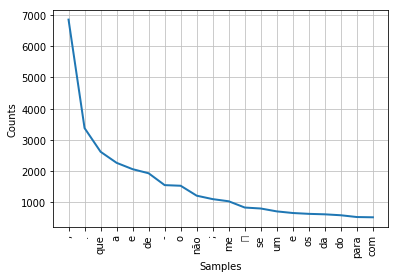

In [65]:
from nltk.probability import FreqDist
fd_words = FreqDist(words_dcasmurro)
fd_words.plot(20)

## Préprocessamento do texto

### Stopwords

Como são consideradas palavras irrelevantes para o entendimento do sentido de um texto, é comum essas palavras serem removidas durante o pré-processamento

A biblioteca contém as __stopwords__ para língua portuguesa:

``` python 
nltk.corpus.stopwords.words(’portuguese’)

clean_raw_casmurro = ' '.join([word for word in raw_casmurro.split() if word not in stopwords])

```

### Outras etapas

Para termos resultados mais assertivos, limpar as __pontuações, maiúsculas/minúsculas__ e plotar novamente o resultado.


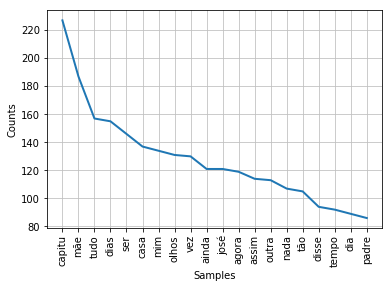

In [76]:
stopwords = nltk.corpus.stopwords.words('portuguese')

raw_casmurro = machado.raw('romance/marm08.txt')
preprocess = raw_casmurro.translate(str.maketrans('','',"-,.!:?;\n")).lower()
clean_raw_casmurro = ' '.join([word for word in preprocess.split() if word not in stopwords])

fd_words = FreqDist(clean_raw_casmurro.split())
fd_words.plot(20)

## Tokenização

Vamos quebrar o texto com o processo de Tokenização e plotar novamente o resultado, agora após o texto ter sido pré-processado.

Lembre-se de importar a biblioteca:

``` python

from nltk.tokenize import word_tokenize 

```

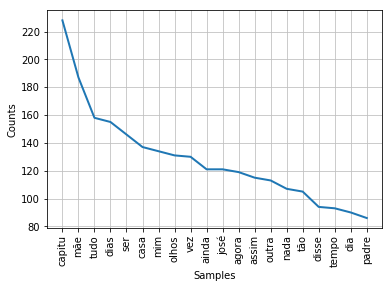

In [77]:
from nltk.tokenize import word_tokenize

token_clean_raw_casmurro = word_tokenize(clean_raw_casmurro)

fd_words = FreqDist(token_clean_raw_casmurro)
fd_words.plot(20)

In [78]:
from nltk.tokenize import sent_tokenize

token_sent_raw_casmurro = sent_tokenize(raw_casmurro)
len(token_sent_raw_casmurro)

3998

### Sumarizador de textos

Vamos criar o sumarizador com o modelo baseado em regras. Ele deve seguir os seguintes passos:

* Leitura do conteúdo: conteúdo textual, no nosso caso estamos utilizando um livro, mas poderia ser uma fonte Web por exemplo.
* Préprocessamento: Realizar qualquer tipo de limpeza ou formatação que o conteúdo possa necessitar.
* Tokenizar a texto: Pegar a entrar e quebrar em palavras individuais.
* Pontuação: Incluir um __score__ da frequência de cada palavra da entrada e pontuar as sentenças.
* Seleção: Escolher as top N sentenças baseadas no score.

Como os nossos tokens anteriores, e a nossa frequência foi toda gerada com texto limpo, vamos recriar os tokens

In [79]:
tk_words = word_tokenize(clean_raw_casmurro)
tk_sent = sent_tokenize(raw_casmurro)

freq_words = FreqDist(tk_words)



Vamos criar o score das sentenças criadas:

Partindo da lista de palavras mais importantes que geramos no passo anterior, precisamos encontrar as __sentenças mais importantes__ do livro. 

Utilizaremos o dicionário __defaultdict__ para criar a lista.

``` python
from collections import defaultdict
sentencas_importantes = defaultdict(int)
```

Agora é hora de popular o dicionário com o índice da sentença e a soma da frequência de cada palavra.


In [83]:
from collections import defaultdict
sentencas_importantes = defaultdict(int)

for i,sent in enumerate(tk_sent):
    for w in word_tokenize(sent.lower()):
        if w in freq_words:
            sentencas_importantes[i] += freq_words[w]
            

Para gerar o resumo, precisamos selecionar as X sentenças mais importantes do texto.

``` python

indexes = nlargest(10, sentence_ranks, key=sentence_ranks.get)
final_sentences = [sentence_tokens[j] for j in sorted(indexes)]
print(' '.join(final_sentences))

```

In [85]:
from heapq import nlargest

indexes = nlargest(10, sentencas_importantes, key=sentencas_importantes.get)
sentencas_finais = [tk_sent[j] for j in sorted(indexes)]
print(' '.join(sentencas_finais))

Tudo era matéria às curiosidades de Capitu, mobílias
antigas, alfaias velhas, costumes, notícias de Itaguaí, a infância e a mocidade
de minha mãe, um dito daqui, uma lembrança dali, um adágio dacolá...

CAPÍTULO XXXII

OLHOS DE RESSACA

Tudo era matéria às curiosidades de
Capitu. Capitu fitou-me uns olhos tão
ternos, e a posição os fazia tão súplices, que me deixei ficar, passei-lhe o
braço pela cintura, ela pegou-me na ponta dos dedos, e...

Outra vez D. Fortunata apareceu à
porta da casa; não sei para que, se nem me deixou tempo de puxar o braço;
desapareceu logo. Capitu deu-me igual conselho,
quando minha mãe lhe anunciou a minha ida definitiva para o seminário:

 Minha filha, você vai perder o
seu companheiro de criança...

Fez-lhe tão bem este tratamento de
filha (era a primeira vez que minha mãe lho dava), que nem teve tempo de
ficar triste; beijou-lhe a mão, e disse-lhe que já sabia disso por mim mesmo. Tenha paciência, vá estudando, não se perde nada
em ir sabendo já daqui alg

## Stemmer

Primeiro vamos testar o Stemmer que faz parte da biblioteca NLTK para Português.

``` python
from nltk.stem import RSLPStemmer
```

_Tokenizar_ e passar o _Stemmer_ no texto e então ver se a frequência das palavras principais muda:

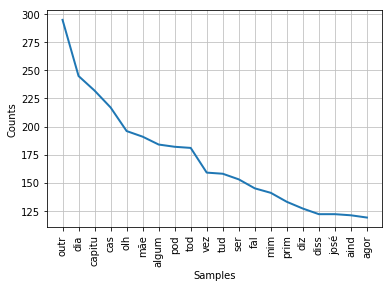

In [93]:
from nltk.stem import RSLPStemmer
stemmer = RSLPStemmer()

i = 0
while i < len(tk_words):
    tk_words[i] = stemmer.stem(tk_words[i])
    i+=1

fd_words = FreqDist(tk_words)
fd_words.plot(20)


### Lemmatização

Não há uma biblioteca oficial para português. Vamos testar a biblioteca __WordNetLemmatizer__ que é para inglês. 
A título de comparação utilizaremos um livro em inglês da biblioteca Gutenberg e o _stemmer_ __PorterStemmer__

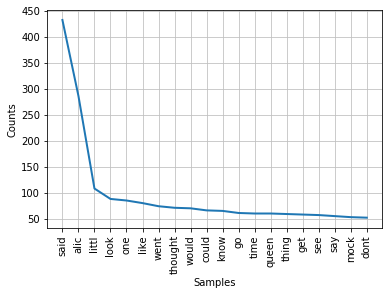

In [107]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import gutenberg

alice_raw = gutenberg.raw('carroll-alice.txt')
stopwords = nltk.corpus.stopwords.words('english')
preprocess = alice_raw.lower().translate(str.maketrans('','',"\"\'-,.!:?;\n*()"))
clean_alice_raw = ' '.join([word for word in preprocess.split() if word not in stopwords])
alice_words = word_tokenize(clean_alice_raw)
stemmed_tokens = alice_words.copy()
lemmatizer_tokens = alice_words.copy()

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

i = 0
while i < len(alice_words):
    stemmed_tokens[i] = stemmer.stem(alice_words[i])
    lemmatizer_tokens[i] = lemmatizer.lemmatize(alice_words[i])
    i+=1
    
fd_stem_words = FreqDist(stemmed_tokens)
fd_stem_words.plot(20)

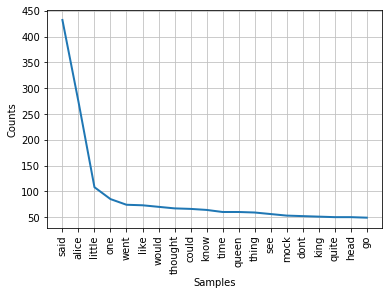

In [108]:
fd_lem_words = FreqDist(lemmatizer_tokens)
fd_lem_words.plot(20)